<a href="https://colab.research.google.com/github/guilhermer1/mvp_AnaliseDeDados/blob/main/An%C3%A1lise_de_Dados_e_Boas_Pr%C3%A1ticas-LaLiga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP Análise de Dados e Boas Práticas

**Nome:** Guilherme Mendes Ribeiro

**Matrícula:** 4052025000053

**Dataset:** [LaLiga Matches Dataset (2019-2025, FBref)](https://www.kaggle.com/datasets/marcelbiezunski/laliga-matches-dataset-2019-2025-fbref)

# Descrição do Problema

O Dataset escolhido é o LaLiga Matches Dataset (2019-2025, FBref), se trata de um conjunto de dados sobre resultados de partidas que ocorreram na primeira divisão da La Liga (Liga espanhola de Futebol). O objetivo é analisar resultados e performances dos times de 2019 a 2025 e verificar se há a possibilidade de prever resultados comparando os dados históricos de diversos times ao logo desses anos.


## Hipóteses do Problema

As hipóteses que tracei são as seguintes:

- Existe uma correlação entre a maior posse de bola e a vitória em partidas?

- A posse de bola se traduz em Chutes a gol e por consequência gols?

- Os jogos fora de casa tem relação direta com as derrotas?

## Tipo de Problema

Considerando o problema apresentado e os dados e características presentes no dataset, este é um problema de **classificação supervisionada**. O objetivo é avaliar a relação entre as características (posse de bola, Chutes, chutes ao gol, local, clube, oponente e resultado) e verificar a possibilidade de uma possível análise preditiva de vitórias com base nesses dados.

## Seleção de Dados

O dataset escolhido é um conjunto de dados coletados utilizando Web Scraping no site FBref.com que traz estatísticas de jogadores e times, além das ligas em geral. As características necessárias para o estudo já estão presentes no dataset, desta forma, não foi necessário uma etapa de seleção de dados externa.


## Atributos do Dataset

O dataset contém 4318 amostras (resultados e estatísticas das partidas ao longo de 2019 a 2025), classificados em Times, resultado e Local, possuindo até 24 atributos, no entanto, o estudo será focado em 6 atributos:

- ***venue*** (local: Away (Partida fora de casa), Home (Partida em casa))
- ***result*** (resultado: W (vitória), L (derrota), D (empate))
- ***gf*** (gols_feitos)
- ***ga*** (gols_sofridos)
- ***poss*** (posse_de_bola)
- ***sh*** (chutes)
- ***sot*** (Chutes_ao_gol)
- ***team*** (Clube: Barcelona, Atletico Madrid, Real Madrid, Athletic Club, Villarreal, Real Betis, Rayo Vallecano, Mallorca, Real Sociedad, Celta Vigo, Osasuna, Sevilla, Girona, Getafe, Espanyol, Leganes, Las Palmas, Valencia, Alaves, Valladolid, Cadiz, Almeria, Granada, Elche, Levante, Huesca, Eibar)

# Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [36]:
# carregamento do dataset (O link direciona a um raw do dataset)
url = 'https://raw.githubusercontent.com/guilhermer1/mvp_AnaliseDeDados/refs/heads/main/matches_full.csv'


# Alterando as labels dos atributos do dataset, para facilitar a visualização
labels_atributos = ['indice', 'data','horario', 'competicao', 'rodada', 'dia_da_semana', 'local', 'resultado', 'gols_feitos', 'gols_sofridos', 'oponente', 'chance_de_marcar', 'chance_de_sofrer_gol',
                    'posse_de_bola', 'publico_presente', 'capitao', 'formacao', 'formacao_oponente', 'arbitro', 'report', 'notas', 'chutes', 'chutes_ao_gol', 'distancia_media_dos_chutes', 'chutes-livres',
                    'pk', 'pkatt', 'temporada', 'clube']

## Uma vez que os dados vão ser lidos diretamente de um CSV, o dataset já é um dataframe.
laligaInicial = pd.read_csv(url,  names=labels_atributos)

# Criando uma cópia de segurança do dataset.
laliga = laligaInicial

## Excluindo a primeira linha, uma vez que mudei os labels das colunas, os anteriores criaram uma nova linha, por essa razão foi necessário apagar a primeira linha.
laliga = laliga.drop(index=0)

laliga.head()



,indice,data,horario,competicao,rodada,dia_da_semana,local,resultado,gols_feitos,gols_sofridos,...,report,notas,chutes,chutes_ao_gol,distancia_media_dos_chutes,chutes-livres,pk,pkatt,temporada,clube
1,0.0,2024-08-17,21:30,La Liga,Matchweek 1,Sat,Away,W,2.0,1.0,...,Match Report,NaN,17.0,5.0,18.6,1.0,1,1,2025,Barcelona
2,1.0,2024-08-24,19:00,La Liga,Matchweek 2,Sat,Home,W,2.0,1.0,...,Match Report,NaN,13.0,5.0,16.6,0.0,0,0,2025,Barcelona
3,2.0,2024-08-27,21:30,La Liga,Matchweek 3,Tue,Away,W,2.0,1.0,...,Match Report,NaN,22.0,5.0,19.3,1.0,0,0,2025,Barcelona
4,3.0,2024-08-31,17:00,La Liga,Matchweek 4,Sat,Home,W,7.0,0.0,...,Match Report,NaN,23.0,11.0,13.7,1.0,0,0,2025,Barcelona
5,4.0,2024-09-15,16:15,La Liga,Matchweek 5,Sun,Away,W,4.0,1.0,...,Match Report,NaN,20.0,9.0,19.1,0.0,0,0,2025,Barcelona


# Análise de Dados

Durante esta etapa, vamos entender melhor a distribuição e relação entre as características das variáveis presentes no dataset, além de identificar possíveis tratamentos que deverão ser feitos na etapa de pré-processamento.

## Total e Tipo das Instâncias

O dataset possui ***4318*** instâncias (partidas), divididas entre os 27 clubes presentes na coluna ***'clube'***, possui diversas características, no entanto, vamos focar em alguns específicos:

- ***venue*** (local: Away (Partida fora de casa), Home (Partida em casa)) ***(categórico)***
- ***result*** (resultado: W (vitória), L (derrota), D (empate)) ***(categórico)***
- ***gf*** (gols_feitos) ***(float)***
- ***ga*** (gols_sofridos) ***(float)***
- ***poss*** (posse_de_bola) ***(float)***
- ***sh*** (chutes) ***(float)***
- ***sot*** (Chutes_ao_gol) ***(float)***
- ***team*** (Clube: Barcelona, Atletico Madrid, Real Madrid, Athletic Club, Villarreal, Real Betis, Rayo Vallecano, Mallorca, Real Sociedad, Celta Vigo, Osasuna, Sevilla, Girona, Getafe, Espanyol, Leganes, Las Palmas, Valencia, Alaves, Valladolid, Cadiz, Almeria, Granada, Elche, Levante, Huesca, Eibar) ***(categórico)***

In [37]:
print(f"Total de instâncias: {len(laliga)}")
print("\nTipos de dados por coluna:")
print(laliga.info())

Total de instâncias: 4318

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 1 to 4318
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   indice                      4318 non-null   float64
 1   data                        4318 non-null   object 
 2   horario                     4318 non-null   object 
 3   competicao                  4318 non-null   object 
 4   rodada                      4318 non-null   object 
 5   dia_da_semana               4318 non-null   object 
 6   local                       4318 non-null   object 
 7   resultado                   4318 non-null   object 
 8   gols_feitos                 4318 non-null   object 
 9   gols_sofridos               4318 non-null   object 
 10  oponente                    4318 non-null   object 
 11  chance_de_marcar            4318 non-null   object 
 12  chance_de_sofrer_gol        4318 non

###Verficação dos tipos de variáveis

Com base nos dados visualizados no dataset e na informação obtida na vizualização acima, foi possível observar que algumas colunas vieram com os tipos errados, por exemplo, a coluna ***possse_de_bola*** onde encontramos valores como ***63.0***, que deveriam ser do tipo ***float***, foram lidos pela ferramenta como tipo ***object*** e desta maneira não poderemos calcular as médias, desvio padrão e etc.

Por essa razão será necessário fazer a alteração dos tipos de dados presentes nas colunas abaixo:

- ***gols_feitos***: object para ***float***
- ***gols_sofridos***: object para ***float***
- ***posse_de_bola***: object para ***float***
- ***chutes***: object para ***float***
- ***Chutes_ao_gol***: object para ***float***



In [38]:
#Alterando os tipos necessários nas colunas que apresentam valores do tipo float.
laliga['gols_feitos'] = pd.to_numeric(laliga['gols_feitos'], errors='coerce')
laliga['gols_sofridos'] = pd.to_numeric(laliga['gols_sofridos'], errors='coerce')
laliga['chance_de_marcar'] = pd.to_numeric(laliga['chance_de_marcar'], errors='coerce')
laliga['chance_de_sofrer_gol'] = pd.to_numeric(laliga['chance_de_sofrer_gol'], errors='coerce')
laliga['posse_de_bola'] = pd.to_numeric(laliga['posse_de_bola'], errors='coerce')
laliga['chutes'] = pd.to_numeric(laliga['chutes'], errors='coerce')
laliga['chutes_ao_gol'] = pd.to_numeric(laliga['chutes_ao_gol'], errors='coerce')
laliga['distancia_media_dos_chutes'] = pd.to_numeric(laliga['distancia_media_dos_chutes'], errors='coerce')
laliga['chutes-livres'] = pd.to_numeric(laliga['chutes-livres'], errors='coerce')
laliga['pk'] = pd.to_numeric(laliga['pk'], errors='coerce')
laliga['pkatt'] = pd.to_numeric(laliga['pkatt'], errors='coerce')

# Demonstrando novamente o tipo, para a verificação real da alteração.
print(laliga.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 1 to 4318
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   indice                      4318 non-null   float64
 1   data                        4318 non-null   object 
 2   horario                     4318 non-null   object 
 3   competicao                  4318 non-null   object 
 4   rodada                      4318 non-null   object 
 5   dia_da_semana               4318 non-null   object 
 6   local                       4318 non-null   object 
 7   resultado                   4318 non-null   object 
 8   gols_feitos                 4318 non-null   float64
 9   gols_sofridos               4318 non-null   float64
 10  oponente                    4318 non-null   object 
 11  chance_de_marcar            4318 non-null   float64
 12  chance_de_sofrer_gol        4318 non-null   float64
 13  posse_de_bola               4318 

Podemos observar que as características que deveriam ser do tipo float foram alteradas.

In [39]:
laliga[['gols_feitos', 'gols_sofridos', 'chance_de_marcar', 'chance_de_sofrer_gol', 'posse_de_bola', 'chutes', 'chutes_ao_gol', 'distancia_media_dos_chutes', 'chutes-livres', 'pk', 'pkatt']]

,gols_feitos,gols_sofridos,chance_de_marcar,chance_de_sofrer_gol,posse_de_bola,chutes,chutes_ao_gol,distancia_media_dos_chutes,chutes-livres,pk,pkatt
1,2.0,1.0,3.2,1.0,63.0,17.0,5.0,18.6,1.0,1,1
2,2.0,1.0,1.8,1.0,64.0,13.0,5.0,16.6,0.0,0,0
3,2.0,1.0,1.4,0.4,64.0,22.0,5.0,19.3,1.0,0,0
4,7.0,0.0,4.7,0.5,70.0,23.0,11.0,13.7,1.0,0,0
5,4.0,1.0,1.9,1.3,55.0,20.0,9.0,19.1,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4314,0.0,1.0,0.8,0.4,63.0,7.0,2.0,18.9,1.0,0,0
4315,0.0,1.0,0.9,1.0,26.0,11.0,2.0,18.1,1.0,0,0
4316,0.0,2.0,0.7,2.0,72.0,14.0,3.0,20.8,3.0,0,0
4317,0.0,1.0,1.3,1.4,52.0,18.0,6.0,21.3,3.0,0,0


###Removendo Nulos

In [40]:
#Verificação de possíveis Nulos.
print("Verificando valores nulos em cada coluna:")
print(laliga.isnull().any())

Verificando valores nulos em cada coluna:
indice                        False
data                          False
horario                       False
competicao                    False
rodada                        False
dia_da_semana                 False
local                         False
resultado                     False
gols_feitos                   False
gols_sofridos                 False
oponente                      False
chance_de_marcar              False
chance_de_sofrer_gol          False
posse_de_bola                 False
publico_presente               True
capitao                       False
formacao                      False
formacao_oponente             False
arbitro                        True
report                        False
notas                          True
chutes                        False
chutes_ao_gol                 False
distancia_media_dos_chutes     True
chutes-livres                 False
pk                            False
pkatt                 

Com os dados acima, podemos observar a presenta de nulos nas colunas ***'publico_presente'***, ***'arbitro'***, ***'notas'*** e ***'distancia_media_dos_chutes'***.

Como estas colunas não são relevantes para o estudo, vamos removê-las do dataset.

In [41]:
#Removendo as colunas 'publico_presente', 'arbitro', 'notas' e 'distancia_media_dos_chutes'.
laliga = laliga.drop(columns=['publico_presente', 'arbitro', 'notas', 'distancia_media_dos_chutes'])

print("Verificando valores nulos em cada coluna:")
print(laliga.isnull().any())

Verificando valores nulos em cada coluna:
indice                  False
data                    False
horario                 False
competicao              False
rodada                  False
dia_da_semana           False
local                   False
resultado               False
gols_feitos             False
gols_sofridos           False
oponente                False
chance_de_marcar        False
chance_de_sofrer_gol    False
posse_de_bola           False
capitao                 False
formacao                False
formacao_oponente       False
report                  False
chutes                  False
chutes_ao_gol           False
chutes-livres           False
pk                      False
pkatt                   False
temporada               False
clube                   False
dtype: bool


Podemos observar a partir dos dados acima, que não há mais valores nulos no dataset.

###Gráfico de barras demonstrando a quantidade de amostras por clube

Número de classificações únicas presentes na coluna 'clube': 27 

Número de amostras totais presentes no Dataset: 4318 



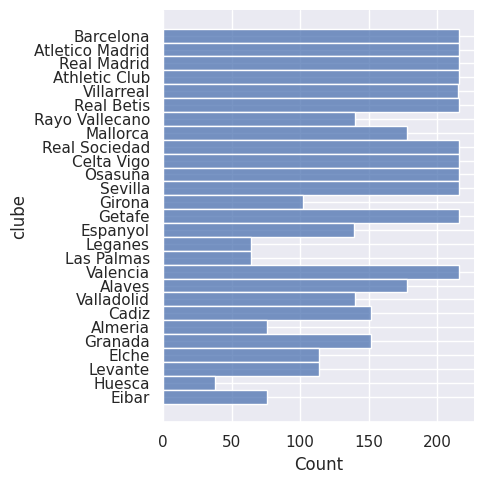

In [7]:
quantidade_de_clubes = len(pd.unique(laliga['clube']))
quantidade_de_amostras = len(laliga)

print("Número de classificações únicas presentes na coluna 'clube':", quantidade_de_clubes, '\n')
print("Número de amostras totais presentes no Dataset:", quantidade_de_amostras, '\n')

# Um gráfico de barras mostrando a contagem de amostras por Clube em todos os anos.
sns.displot(
    laliga, y="clube",
    binwidth=7, height=5, facet_kws=dict(margin_titles=True),
)

O gráfico de barras mostra a quantidade de amostras (partidas) por clube presente na coluna "clube". É possível observar a diferença de amostras quando comparamos alguns clubes com outros, analisando um clube específico (Eibar), pude apurar que a razão de alguns terem um número de jogos menor, se dá pelo fato do clube ter sido rebaixado entre os anos 2019-2025, desta forma, não participando da La liga em todos os anos do estudo.

## Estatísticas Descritivas


In [8]:
# Estatísticas descritivas básicas do dataset
laliga[['gols_feitos', 'gols_sofridos', 'posse_de_bola', 'chutes', 'chutes_ao_gol']].describe()

,gols_feitos,gols_sofridos,posse_de_bola,chutes,chutes_ao_gol
count,4318.000000,4318.000000,4318.000000,4318.000000,4318.000000
mean,1.270032,1.270032,50.001158,11.512043,3.785086
std,1.168970,1.168970,11.435318,4.838242,2.288167
min,0.000000,0.000000,18.000000,0.000000,0.000000
25%,0.000000,0.000000,42.000000,8.000000,2.000000
50%,1.000000,1.000000,50.000000,11.000000,3.000000
75%,2.000000,2.000000,58.000000,14.000000,5.000000
max,7.000000,7.000000,82.000000,36.000000,17.000000


### Média


In [9]:
# média dos atributos numéricos do dataset
laliga[['gols_feitos', 'gols_sofridos', 'posse_de_bola', 'chutes', 'chutes_ao_gol']].describe().loc['mean']

,mean
gols_feitos,1.270032
gols_sofridos,1.270032
posse_de_bola,50.001158
chutes,11.512043
chutes_ao_gol,3.785086


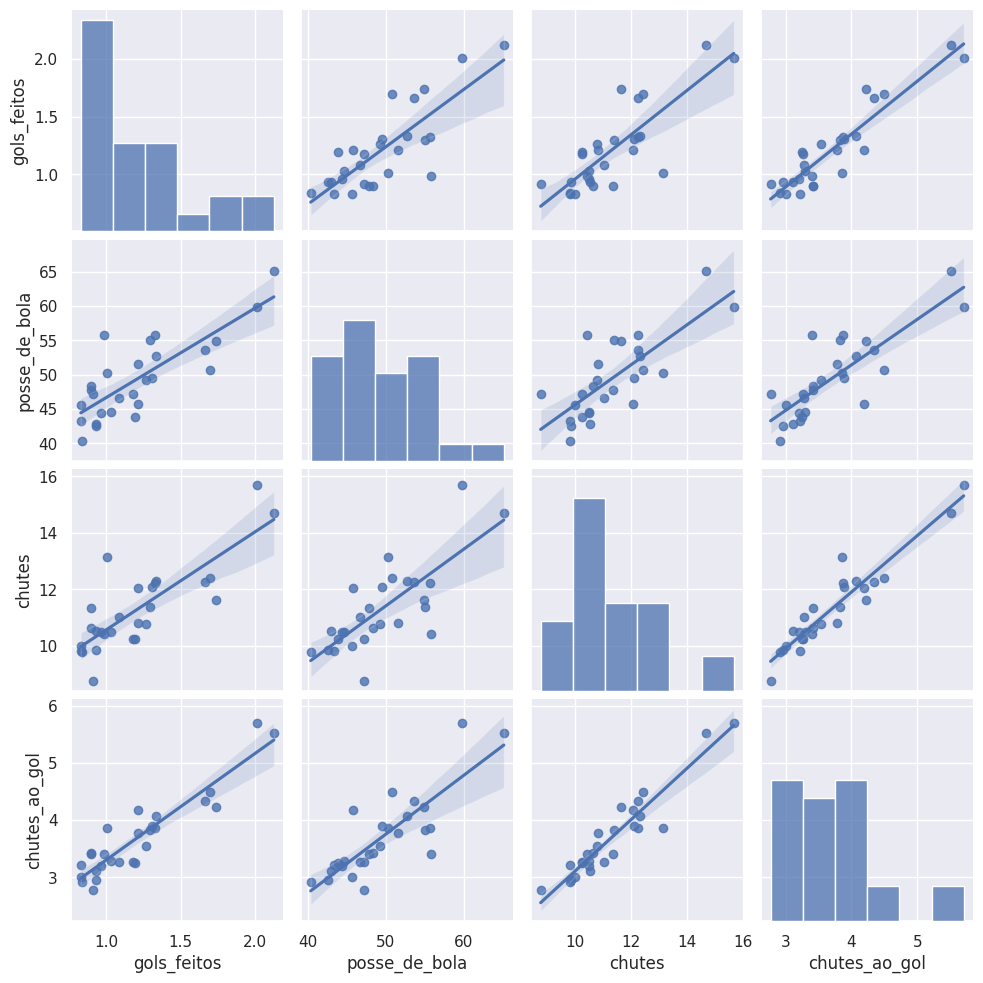

In [44]:
## médias por clube
sns.pairplot(laliga.groupby('clube')[['gols_feitos', 'posse_de_bola', 'chutes', 'chutes_ao_gol']].mean(), kind='reg');


Análisando os gráficos com as médias e comparando os resultados, podemos observar que há uma relação direta entre ***'posse_de_bola'*** e ***'chutes_ao_gol'***, ***'chutes'*** e ***'gols_feitos'***.

É possível observar que para todos os clubes, a ***'posse_de_bola'*** está diretamente ligada a quantidade de gols feitos e por consequência a vitória.

O que já é um bom indicativo para que as duas primeiras hipóteses do estudo estejam corretas.

### Desvio Padrão


In [17]:
# desvio padrão dos atributos numéricos do dataset
laliga[['gols_feitos', 'posse_de_bola', 'chutes', 'chutes_ao_gol']].describe().loc['std']

,std
gols_feitos,1.168970
posse_de_bola,11.435318
chutes,4.838242
chutes_ao_gol,2.288167


<Axes: >

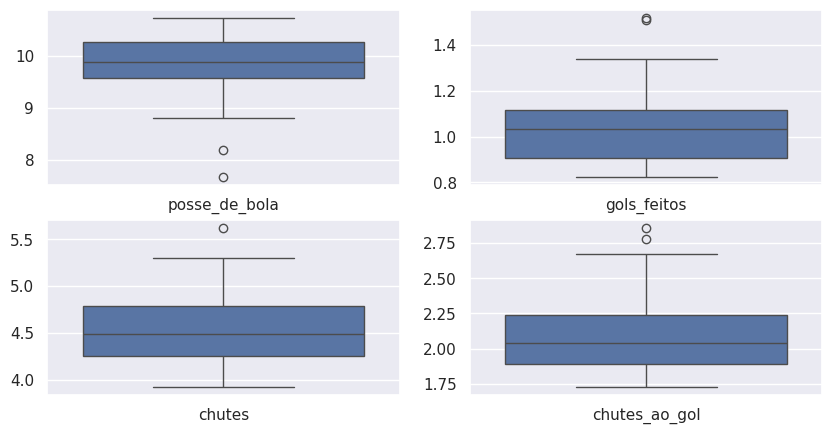

In [18]:
### BOXPLOT dos desvios padrão por clube
fig, axes = plt.subplots(2, 2, figsize=(10, 5))

desvio_gols_feitos = laliga.groupby('clube')[['gols_feitos']].std();
desvio_posse_de_bola = laliga.groupby('clube')[['posse_de_bola']].std();
desvio_chutes = laliga.groupby('clube')[['chutes']].std();
desvio_chutes_ao_gol = laliga.groupby('clube')[[ 'chutes_ao_gol']].std();

sns.boxplot(data=desvio_posse_de_bola, ax=axes[0,0])
sns.boxplot(data=desvio_gols_feitos, ax=axes[0,1])
sns.boxplot(data=desvio_chutes, ax=axes[1,0])
sns.boxplot(data=desvio_chutes_ao_gol, ax=axes[1,1])

Observando os gráficos acima, podemos observar a presença de alguns outliers com os dados de alguns clubes, no entanto, estes outliers são números reais, que podem comprovar as duas primeiras hipóteses, há partidas onde a ***'posse_de_bola'*** de um clube foi muito maior que a do oponente e por essa razão os números de ***'chutes'***, ***'chutes_ao_gol'***, e ***'gols_feitos'*** foram discrepantes em relação ao do adversário.

Os números abaixo representam a partida com a maior posse de bola presente no Dataset.


In [24]:
# Selecionando a linha com o maior número de 'posse_de_bola' presente no dataset.
maior_posse_de_bola = laliga.sort_values(by='posse_de_bola', ascending=False).head()

maior_posse_de_bola[['resultado', 'posse_de_bola', 'chutes', 'chutes_ao_gol', 'gols_feitos', 'gols_sofridos', 'clube']]


,resultado,posse_de_bola,chutes,chutes_ao_gol,gols_feitos,gols_sofridos,clube
2056,D,82.0,36.0,9.0,0.0,0.0,Real Madrid
2884,L,82.0,21.0,8.0,1.0,2.0,Barcelona
3616,W,81.0,18.0,6.0,1.0,0.0,Barcelona
2907,L,81.0,16.0,4.0,1.0,2.0,Barcelona
2897,D,81.0,19.0,3.0,1.0,1.0,Barcelona


Como pudemos observar acima, uma maior ***'posse_de_bola'*** gerou maior quantidaded de ***'chutes'*** e ***'chutes_ao_gol'***, ainda que estes chutes não tenham se convertido em ***'gols_feitos'***, a ***'posse_de_bola***' gerou discrepância nas chances criadas.

## Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

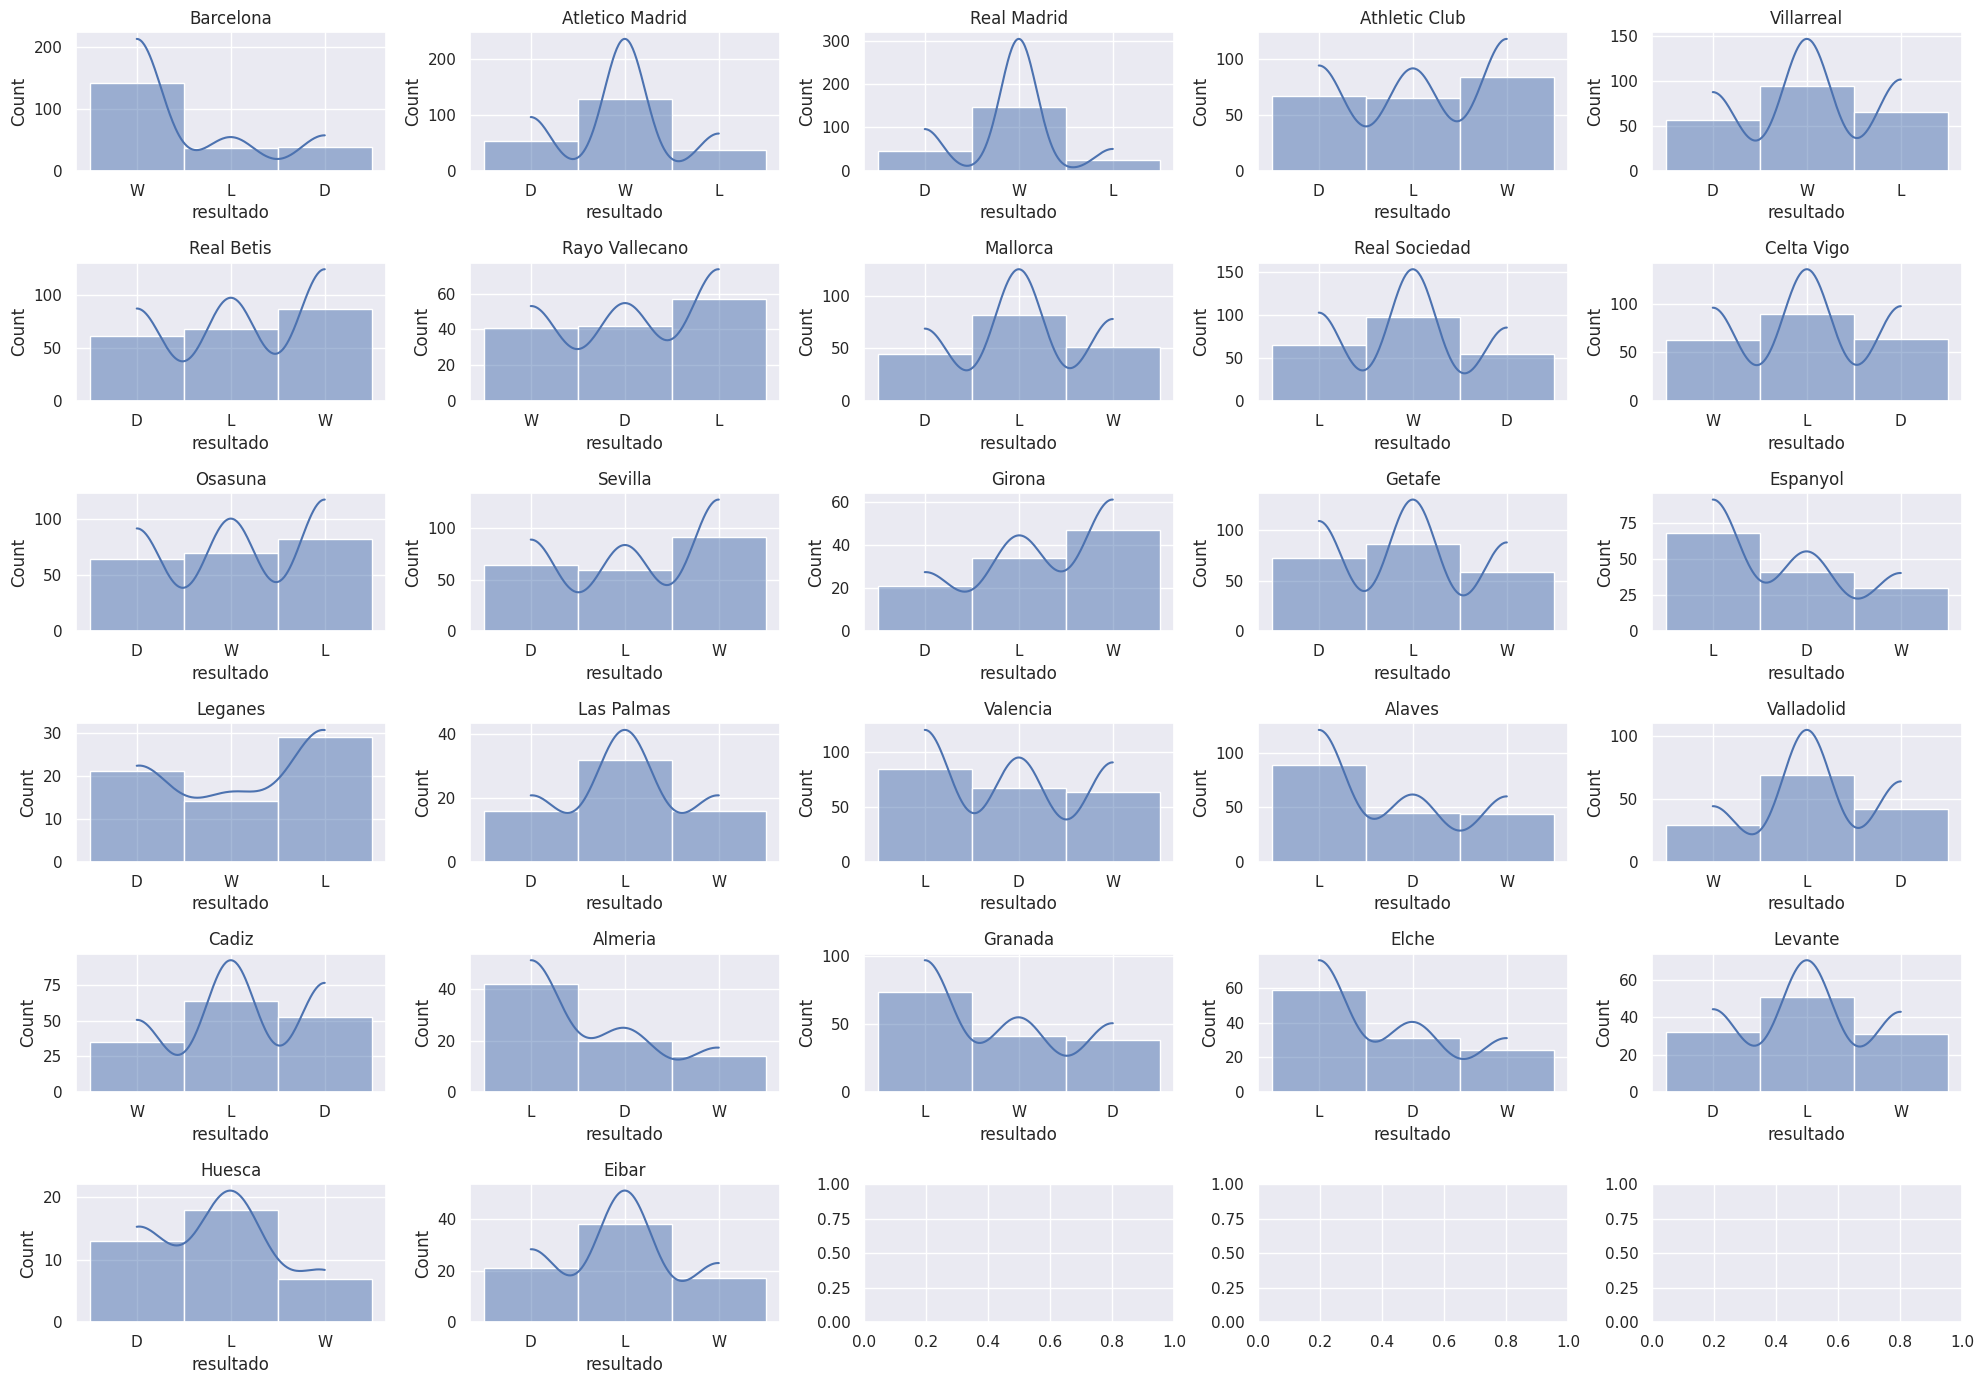

In [70]:
# histograma de resultados por clubes
fig, axes = plt.subplots(6, 5, figsize=(20, 14))

clubes = pd.unique(laliga['clube'])

i = 0
j = 0

for clube in clubes:

  laligaClube = laliga[laliga['clube'] == clube]

  laligaClube = pd.DataFrame(laligaClube)

  sns.histplot(data=laligaClube, x="resultado", kde=True, ax=axes[i,j], legend=True).set_title(clube)

  plt.tight_layout()

  if j == 4:
    i = i+1
    j = 0
  else:
    j = j+1

### *sepal length*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

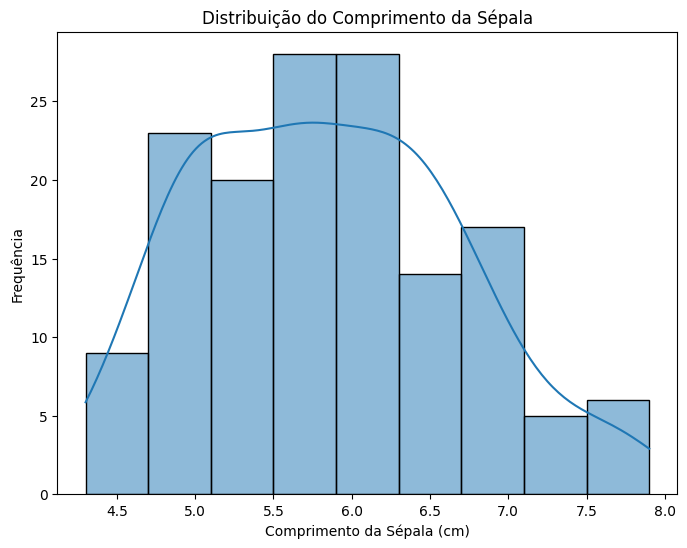

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

O histograma mostra a distribuição do comprimento da sépala. A curva de densidade estimada (KDE) nos indica que a distribuição parece bimodal ou multimodal, indicando que as espécies podem ter comprimentos de sépalas diferentes.

### *sepal width*

Alguma curiosidade ou fato importante sobre o atributo que estamos olhando a distribuição?

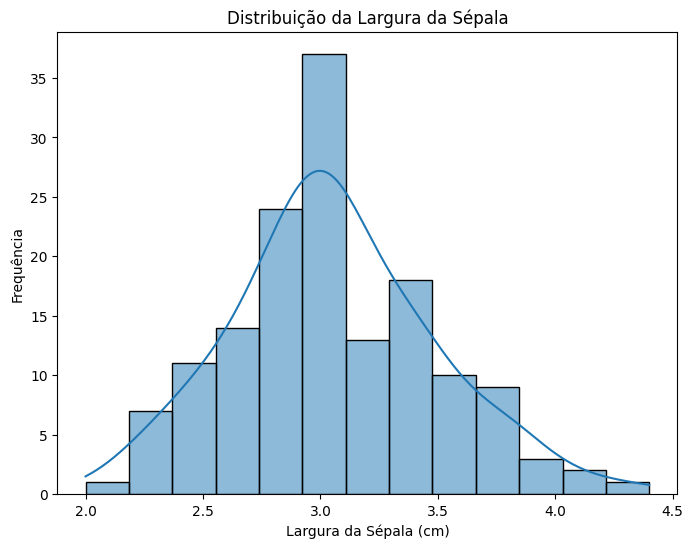

In [ ]:
plt.figure(figsize=(8, 6))
# Histograma do comprimento da sépala (um dos atributos)
sns.histplot(df['sepal width (cm)'], kde=True)
plt.title('Distribuição da Largura da Sépala')
plt.xlabel('Largura da Sépala (cm)')
plt.ylabel('Frequência')
plt.show()

Quais impressões você tem sobre a distribuição do atributo 'sepal width'?

## Boxplot

Para entender as diferenças entre as espécies, devemos olhar como se comportam os valores quando agrupadas por espécie. Isso nos permite comparar a média, mediana e desvio padrão de cada característica para Iris setosa, Iris versicolor e Iris virginica, além de visualizar suas distribuições por meio de boxplots.


In [ ]:
# Estatísticas descritivas agrupadas por espécie
df.groupby('species').describe()

sepal length (cm)                                              \
                       count   mean       std  min    25%  50%  75%  max   
species                                                                    
setosa                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor              50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica               50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal width (cm)         ... petal length (cm)       \
                      count   mean  ...               75%  max   
species                             ...                          
setosa                 50.0  3.428  ...             1.575  1.9   
versicolor             50.0  2.770  ...             4.600  5.1   
virginica              50.0  2.974  ...             5.875  6.9   

           petal width (cm)                                            
                      count   mean       std  min  25%  50%  75%  max  
species                                                                
setosa                 50.0  0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor             50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica              50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

### *petal length* por Espécie


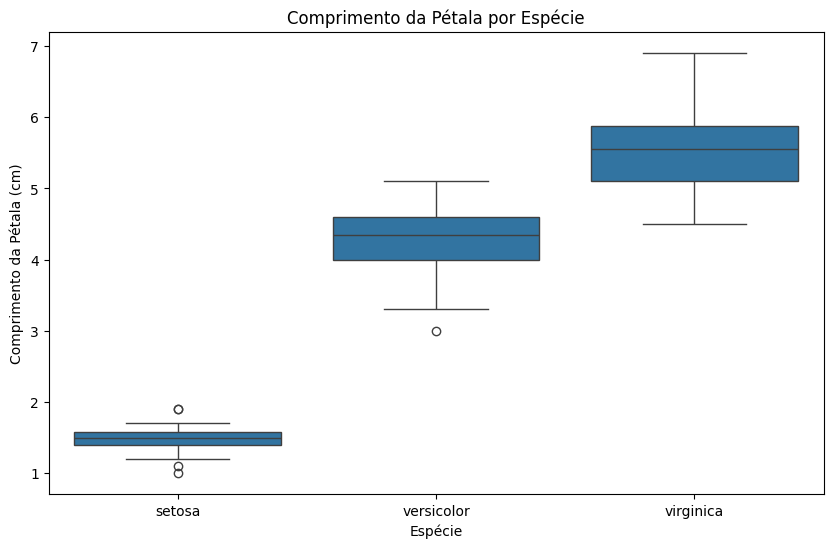

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title('Comprimento da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Comprimento da Pétala (cm)')
plt.show()

O boxplot do comprimento da pétala por espécie demonstra claramente que a Iris setosa tem pétalas significativamente mais curtas do que as outras duas espécies. Há uma sobreposição entre Iris versicolor e Iris virginica, mas as medianas e as caixas indicam uma distinção.

### *petal width* por Espécie

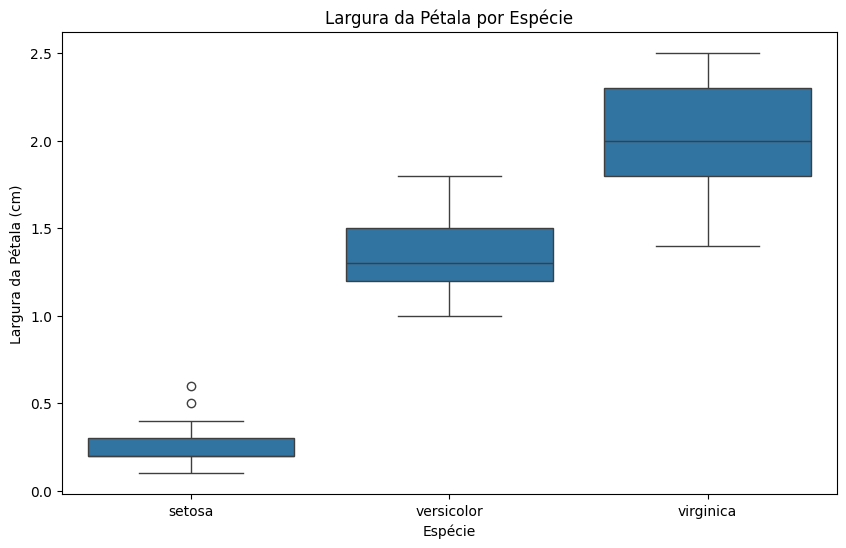

In [ ]:
# Boxplot do comprimento da pétala por espécie
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title('Largura da Pétala por Espécie')
plt.xlabel('Espécie')
plt.ylabel('Largura da Pétala (cm)')
plt.show()

Quais impressões o boxplot trouxe?

## Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [ ]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, :4].corr()


Matriz de Correlação:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


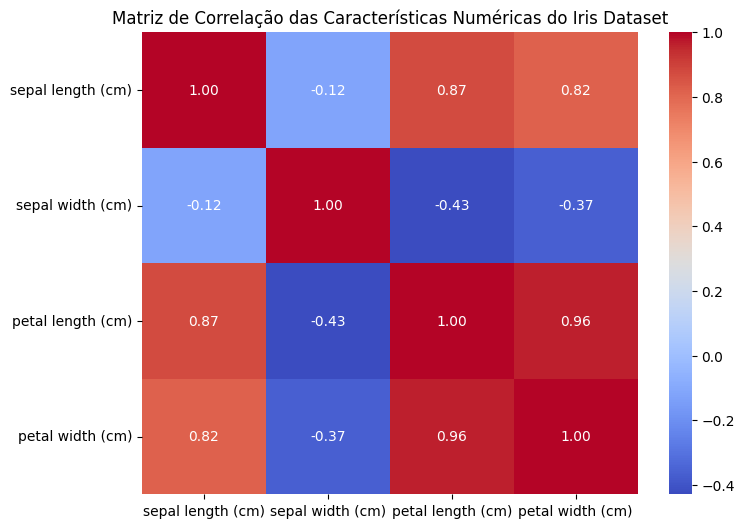

In [ ]:
plt.figure(figsize=(8, 6))
# mapa de calor das variáveis numéricas
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Iris Dataset')
plt.show()

O mapa de calor da matriz de correlação revela fortes correlações positivas entre *petal length* e *petal width*, bem como entre *sepal length* e *petal length*/*petal width*. Isso sugere que essas características se movem juntas, o que é útil para a seleção de características.

## Tratamento de Valores Nulos

O dataset Iris original não possui valores nulos. No entanto, o tratamento de valores nulos é crucial e pode envolver imputação (preenchimento com média, mediana, moda) ou remoção de linhas/colunas.

In [ ]:
# Verificar a presença de valores nulos no dataset original
print("Valores nulos no dataset Iris:")
df.isnull().sum()

Valores nulos no dataset Iris:


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
species,0


# Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

In [ ]:
# Separar features (X) e target (y)
X = df.drop('species', axis=1)
y = df['species']

In [ ]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (105, 4)
Dimensões de X_test: (45, 4)
Dimensões de y_train: (105,)
Dimensões de y_test: (45,)


## Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.



In [ ]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()

In [ ]:
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
print(df_normalized.head())


Primeiras 5 linhas dos dados normalizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.208333           0.327586          0.416667
1           0.527778          0.083333           0.586207          0.583333
2           0.222222          0.750000           0.068966          0.083333
3           0.694444          0.500000           0.827586          0.916667
4           0.388889          0.333333           0.517241          0.500000


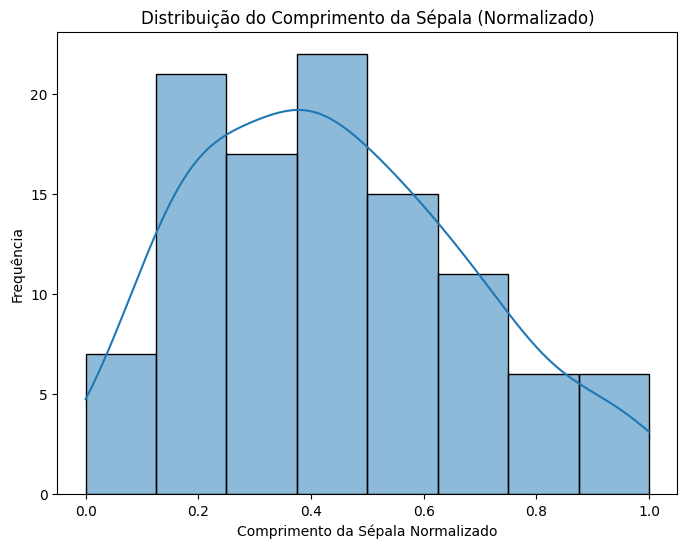

In [ ]:
# Visualização da distribuição após a normalização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_normalized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Normalizado)')
plt.xlabel('Comprimento da Sépala Normalizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a normalização mostra que os valores foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

## Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [ ]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()

In [ ]:
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)

In [ ]:
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

In [ ]:
print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
print(df_standardized.head())


Primeiras 5 linhas dos dados padronizados (treino):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900459         -1.220248          -0.441986         -0.136610
1           0.380366         -1.879558           0.402829          0.380294
2          -0.900459          1.636764          -1.286801         -1.170419
3           1.078998          0.318143           1.191323          1.414103
4          -0.201827         -0.560937           0.177545          0.121842


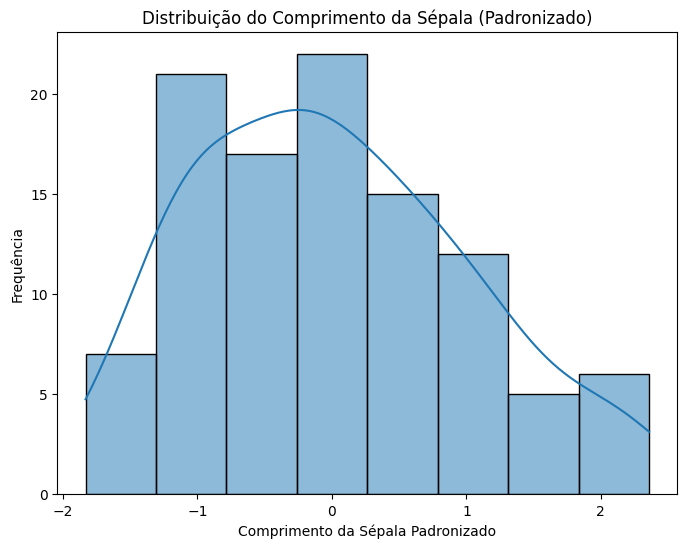

In [ ]:
# Visualização da distribuição após a padronização (exemplo para uma característica)
plt.figure(figsize=(8, 6))
sns.histplot(df_standardized['sepal length (cm)'], kde=True)
plt.title('Distribuição do Comprimento da Sépala (Padronizado)')
plt.xlabel('Comprimento da Sépala Padronizado')
plt.ylabel('Frequência')
plt.show()

O histograma de *sepal length* após a padronização mostra que os valores foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Outras Transformações e Etapas de Pré-Processamento

Outras etapas de pré-processamento incluem a seleção de características, redução de dimensionalidade (como PCA) ou criação de novas características (feature engineering). O que você faria a mais?



# Conclusão

A análise e pré-processamento do dataset Iris demonstram a importância de entender a estrutura dos dados antes da modelagem. O dataset é limpo e balanceado, com características numéricas bem definidas que permitem uma clara separação entre as espécies, especialmente a Iris setosa. A análise exploratória revelou correlações importantes entre as características e a eficácia de visualizações como boxplots para distinguir as classes. As etapas de normalização e padronização são fundamentais para preparar os dados para diversos algoritmos de aprendizado de máquina, garantindo que o modelo possa aprender eficientemente com as relações presentes nos dados.

As três hipóteses levantadas foram validadas:

1.   *As diferentes espécies de Íris podem ser distinguidas com base nas medições de suas sépalas e pétalas?* Sim, dado as análises que fizemos no boxplot, observamos um comportamento muito claro e distinto.

2.   *Existe uma correlação entre comprimento da pétala e largura da pétala?* Existe forte correlação entre os atributos *petal length* e *petal width*.

3.   *A espécie Iris setosa é mais facilmente separável das outras duas espécies?* Sim, devido às suas características distintas de menor comprimento e largura da pétala.